In [55]:
import csv
import os

from matplotlib import pyplot

# Exercise 2.3

*2.3 Data processing:* Go to the folder `Names` and make a graph similar to Figure 2.8, but for girls.

In [56]:
YEARS = list(range(1880, 2011))

In [57]:
with open('/home/bgawalt/ros/datasets/names/allnames_clean.csv') as infile:
    rows = [row for row in csv.DictReader(infile) if row['sex'] == 'F']

In [58]:
# Map from (letter, year) to count
suffix_year = {}
# Map from letter to total
suffix_total = {}
# How many babies total corresponding to each year?
year_total = [0 for year in YEARS]
for row in rows:
    suffix = row['name'][-1].upper()
    for year_idx, year in enumerate(YEARS):
        k = (suffix, year)
        inc = int(row[f'X{year}'])
        suffix_year[k] = suffix_year.get(k, 0) + inc
        suffix_total[suffix] = suffix_total.get(suffix, 0) + inc
        year_total[year_idx] += inc

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


Text(0, 0.5, "Percentage of all girls' names that year")

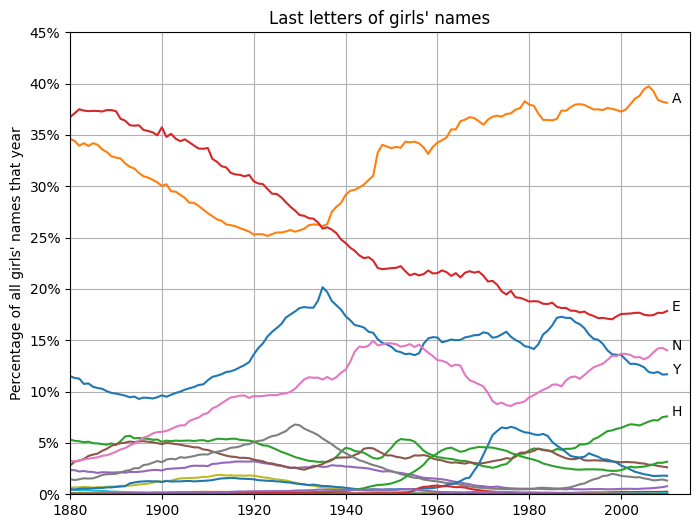

In [59]:
fig = pyplot.figure(figsize=(8, 6))
ax = fig.gca()

for suffix in suffix_total:
    suffix_count = [suffix_year[(suffix, year)] for year in YEARS]
    suffix_share = [float(sc) / t for (sc, t) in zip(suffix_count, year_total)]
    ax.plot(YEARS, suffix_share)
    if suffix_share[-1] > 0.05:
        ax.text(2011, suffix_share[-1], suffix)

ax.set_ylim(0, 0.45)
ax.set_xlim(1880, 2015)
ax.grid()

yticks_orig = ax.get_yticks()
print(yticks_orig)
yticks_fancy = [f'{int(100 * yt)}%' for yt in yticks_orig]
ax.set_yticks(yticks_orig, labels=yticks_fancy)

ax.set_title("Last letters of girls' names")
ax.set_ylabel("Percentage of all girls' names that year")